# PS 88 Week 3 Lab: Utility, Expected Utility, and Pivotal Voters

In this lab we will use tables to explore several of the topics covered in the lecture. First we will think about preferences and utility with the aid of tables. Then we will move on to some expected utility calculations in the context of deciding what candidates to vote for (or whether to abstain) in an election. 

In [2]:
# Libraries we will use in the lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datascience import Table
from ipywidgets import interact
%matplotlib inline

## Part 1: Utility with Tables

When the utilities associated with different choices are a function of several variables, it can be useful to keep track of this with the kinds of tables you learned about in Data 8. 

Let's use the example of the Democratic primary in 2020. There were lots of candidates who ran in this primary, but we will focus on 6 candidates who won enough votes in at least one state to earn a delegate for the national convention. Suppose that our voters care about three factors: 
- how liberal the candidate is, which we will measure on a scale from 1 to 10
- the candidate gender, which we will code as 1 for female and 0 otherwise
- whether the candidate has experience in the executive branch of government (i.e., were they ever a Mayor, Governor or Vice President), coded as 1 if so and 0 if not

Here is a table that contains this data for the candidates who won a delegate. (Note: I got the liberal measure from eyeballing a graphic in <a href="https://www.businessinsider.com/2020-democratic-presidential-candidates-political-spectrum-ranking-2019-5">this article</a>, which was based on a survey of voter perceptions.)

In [3]:
cands = ["Biden", "Sanders", "Warren", "Bloomberg", "Klobuchar", "Gabbard"]
candinfo = Table().with_columns("Name", 
                            cands,
                           "Liberal",
                           [5,10,8,2,4,6],
                           "Female",
                           [0,0,1,0,1,1],
                           "Exec",
                           [1,0,0,1,0,0])
candinfo

Name,Liberal,Female,Exec
Biden,5,0,1
Sanders,10,0,0
Warren,8,1,0
Bloomberg,2,0,1
Klobuchar,4,1,0
Gabbard,6,1,0


Let's consider a voter Bob, who is pretty moderate, would like there to be a female nominee, and also thinks executive experience is important. We can capture this by giving Bob a utility function
$$
U_{bob} = -|Liberal - 3| + 2 \times Female + Exec
$$

The first term captures the idea that Bob likes candidates less whose liberalism score is far from 3, which we can think of as his "ideal liberalism" value (more on this in a couple weeks!). This means he likes candidate with a score of 3 best, and as their score gets farther away he likes them less.

The second and third terms mean he adds 2 to his utility for female candates, and 1 to those with executive experience. Here is how we can compute his utility for each candidate:

In [4]:
Ubob = -abs(candinfo.column("Liberal")-3) + 2*candinfo.column("Female") + candinfo.column("Exec")
Ubob

array([-1, -7, -3,  0,  1, -1])

Let's create a new table to keep track of the utilities:

In [5]:
utils = candinfo.select("Name")
utils = utils.with_column("Ubob", Ubob)
utils

Name,Ubob
Biden,-1
Sanders,-7
Warren,-3
Bloomberg,0
Klobuchar,1
Gabbard,-1


If we want to see who Bob likes best, one way is to sort the table in descending order

In [6]:
utils.sort("Ubob", descending=True)

Name,Ubob
Klobuchar,1
Bloomberg,0
Biden,-1
Gabbard,-1
Warren,-3
Sanders,-7


So, it looks like Bob likes Klobuchar best.

**Question 1.1. There are two candidates who Bob is indifferent between. Which two, and how can you tell?**

*Answer for 1.1*

Just go get some practice/refresh of table functions, another way we can find the best candidate is by finding the one that gives Bob his maximum utility value. First, let's figure out what this is and save it as a variable called `maxUbob`.

In [7]:
maxUbob = np.max(utils.column("Ubob"))
maxUbob

1

And now we can use the `where` function to find candidates that maximize Bob's utility.

In [8]:
utils.where("Ubob", maxUbob)

Name,Ubob
Klobuchar,1


Suppose a second voter named Anna has the following utility:
$$
U_{anna} = -|Liberal - 8| + 3 \cdot Exec
$$

**Question 1.2. Describe Anna's preferences in words. Does she like relatively moderate or liberal candidates? How does she value executive experience? Does she care about candidate gender? (Hint: it may help to compare her utility function to Bob's)**


*Answer for 1.2*

**Question 1.3. Write code to (1) compute the utility the utility Anna assigns to each candidate, (2) add a column to the `utils` table with this information**

In [9]:
# Code for 1.3

**Question 1.4. Which candidate(s) are a rationalizable choice for Anna? (Write some code to sort the table if you'd like, or you can just look at the table)**

In [71]:
# Code for 1.4

*Words for 1.4*

**Question 1.5 Come up with a utility function for a voter named Cindy who's favorite candidate is Bloomberg.**

In [72]:
# Code for 1.5


## Part 2: Computing and plotting expected utility

We can use Python to do expected utility calculations and explore the relationship between parameters in decision models and optimal choices. 

In class we showed that the expected utility for voting for a preferred candidate can be written $p_1 b - c$. A nice way to do calculations like this is to first assign values to the variables:

In [73]:
p1=.6
b=100
c=2
p1*b-c

58.0

**Question 2.1. Write code to compute the expected utility to voting when $p_1 = .3$, $b=30$, and $c=.6$**

In [74]:
# Code for to 2.1 here

We don't necessarily care about these expected utilities on their own, but how they compare to the expected utility to abstaining, which is equal to $p_0 b$. 

**Question 2.2. If $b=30$ and $p_0 = .27$, write code to compute the expected utility to abstaining.**

In [75]:
# Code for 2.2 here

**Question 2.3. Given 2.1 and 2.2, is voting the expected utility maximizing choice for these parameters?**

*Answer for 2.3*

We can also use the graphing capabilities of Python to learn more about how these models work. 

The following block of code plots the expected utility for voting (solid line) and abstaining (dashed line) as a function of the voting cost.

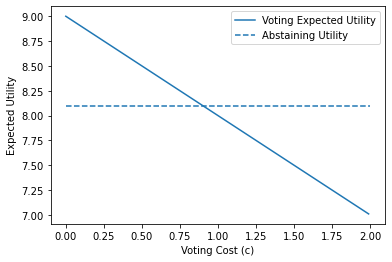

In [19]:
# Setting Parameters
b=30
p0=.27
p1=.3
# Horizontal line for abstaining utility
plt.hlines(p0*b, 0,2, label='Abstaining Utility',linestyles="dashed")
# Defining the range of c
c = np.arange(0,2, step=.01)
# expected utility for voting as a function of c
euv = p1*b-c
# Plotting and labelling
plt.ticklabel_format(style='plain')
plt.plot(c,euv, label='Voting Expected Utility')
plt.xlabel('Voting Cost (c)')
plt.ylabel('Expected Utility')
plt.legend()

Note the abstaining utility is flat (since the expected utility to abstaining is not a function of $c$). However, the voting expected utility is decreasing in $c$.

**Question 2.4. From this graph, identify the values of $c$ where it is rational to vote (given these values of $p_0$, $p_1$, and $b$)**

*Answer for 2.4*

**Question 2.5. (OPTIONAL) In the cell below, write some code which uses the calculating functions of python to verify your answer to the previous question**

In [76]:
# Code for 2.5 here


We can also use python (and tables) to do expected utility calculations with more than two options pretty easily. 

Let's suppose that in our list of democratic candidates, the probability of each winning at some point was: Biden (45%), Sanders (30%), Warren (15%), Bloomberg (5%), Klobuchar (4%), Gabbard (1%). We can capture this as a list, and check that it sums to 1:

In [23]:
pwin1 = [.45, .3, .15, .05, .04, .01]
sum(pwin1)

1.0

It might be nice to add this to our candidate/utility table:

In [24]:
utils=utils.with_column("pwin1", pwin1)
utils

Name,Ubob,Uanna,Ucindy,pwin1
Biden,-1,0,-3,0.45
Sanders,-7,-2,-8,0.3
Warren,-3,0,-6,0.15
Bloomberg,0,-3,0,0.05
Klobuchar,1,-4,-2,0.04
Gabbard,-1,-2,-4,0.01


If we multiply the arrays of Bob's utility with the probability of each winning, and then sum them up, that will sum up all of the $p_i u_i$'s, giving the expected utility:

In [25]:
utils.column("Ubob")*utils.column("pwin1")

array([-0.45, -2.1 , -0.45,  0.  ,  0.04, -0.01])

In [26]:
EUbob1 = sum(utils.column("Ubob")*utils.column("pwin1"))
EUbob1

-2.9699999999999998

**Question 2.6. Write a line of code to compute the expected utility for Anna**

In [77]:
# Code for 2.6

Now suppose Klobuchar drops out. As she was generally considered a centrist, this would presumably help Biden at the cost of the more liberal candidates (Sanders, Warren). Suppose the new probabilities of winning are Biden (65%), Sanders (25%), Warren (5%), Bloomberg (4%), Klobuchar (0%), Gabbard (1%). 

**Question 2.7. Since Klobuchar was Bob's favorite candidate, we might think that he is sad to have her out of the race. Write code to see if Bob's expected utility goes up or down, and then explain why.**

In [79]:
# Code for 2.7

*Words for 2.7*

## Part 3: Simulating votes

How can we estimate the probability of a vote mattering? One route is to use probability theory, which in realistic settings (like the electoral college in the US) requires lots of complicated mathematical manipulation. Another way, which will often be faster and uses the tools you are learning in Data 8, is to run simulations.

As we will see throughout the class, simulation is an incredibly powerful tool that can be used for many purposes. For example, later in the class we will use simulation to see how different causal processes can produce similar data.

For now, we are going to use simulation to estimate the probability a vote matters. The general idea is simple. We will create a large number of "fake electorates" with parameters and randomness that we control, and then see how often an individual vote matters in these simulations. 

Before we get to voting, let's do a simple exercise as warmup. Suppose we want to simulate flipping a coin 10 times. To do this we can use the `random.binomial` function from `numpy` (imported above as `np`). This function takes two arguments: the number of flips (`n`) and the probability that a flip is "heads" (`p`). More generally, we often call $n$ the number of "trials" and $p$ the probability of "success".

The following line of code simulates flipping a "fair" (i.e., $p=.5$) coin 10 times. Run it a few times.

In [30]:
# First number argument is the number of times to flip, the second is the probability of a "heads"
np.random.binomial(n=10, p=.2)

1

We can simulate 100 coin flips at a time by changing the `n` argument to 100. The output tells us how many of these simulated coin flips came up heads. Run it a few times to see what happens for different simulations.

In [32]:
np.random.binomial(n=100, p=.5)

51

Let's consider the case of the second and final round of the 2022 Brazilian election, where the two candidates were Lula da Silva and Jair Bolsonaro. Around about 119 million people voted. This is a big number to have to keep typing, so let's define a variable: 

In [33]:
brazilvotes = 119000000

**Question 3.1. Write a line of code to simulate 119 million people flipping a coin and counting how many heads there are.**

In [80]:
# Code for 3.1 here

Of course, we don't care about coin flipping per se, but we can think about this as the number of "yes" votes if we have n people who vote for a candidate with probability $p$. In the Brazilian election, about 50.9% of the voters voted for Lula. Let's do a simulated version of the election: by running `np.random.binomial` with 119 million million trials and a probability of "success" of 50.9%. 

Coding note: sometimes we will include a line called `np.random.seed`. This ensures that our random number generator (while still effectively "random" if we only run it once) alway produces the same output.

In [35]:
np.random.seed(88)
lula_count = np.random.binomial(n=brazilvotes, p=.509)
lula_count

60566811

In reality, Lula won 60.35 million votes, which is pretty close to our simulated value. 



**Question 3.2. Lula's opponent Bolsonaro won 49.1% of the vote. Write code calculate how many votes he gets in a simulated election with 119 million voters who pick him with probability $.491$. Write your code after the `np.random.seed(88)` line.**


In [81]:
# Code for 3.2
np.random.seed(88)


## Part 4. Pivotal votes.

One reason we think about "simulated" elections like this is to get a sense of the probability that an individual vote will matter in an election.

Let's start with a simple example. Suppose that you are on a committee with 10 other people which is going to vote on two potential policies, A or B. Assume the other 10 are equally likely to vote for policy A or policy B, and you prefer policy B. However, you are also need to finish your PS 88 lab, so you are thinking about skipping the meeting. If you turn out to vote, you will be pivotal if the other 10 are split evenly between the two policies. How often will that is happen?

We can answer this question by running a whole bunch of simulations where we effectively flip 10 coins and count how many heads there are. 

The following line runs the code to do 10 coin flips with `p=.5` 10,000 times, and stores the results in an array. 

In general if you write `[function(args) for _ in range(x)]` Python will run `function(args)` x times, and store the results in a list. We will often use code like this to run simulations where `function(args)` contains some element of randomness.

In [38]:
ntrials=10000
trials10 = [np.random.binomial(n=10, p=.5) for _ in range(ntrials)]

Let's put these in a table, and then make a histogram to see how often each trial number happens. To make sure we just get a count of how many are at each interval, we need to get the "bins" right by adding a `bins=range(11)` argument, which ensures that each bin corresponds to 1 number.

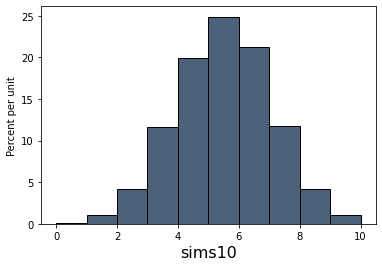

In [39]:
simtable = Table().with_column("sims10",trials10)
simtable.hist("sims10", bins=range(11))

Let's see what happens with 20 coin flips. First we create a bunch of simulations:

In [40]:
trials20 = [np.random.binomial(n=20, p=.5) for _ in range(ntrials)]

And then add the new trials to `simtable` using the `.with_column()` function.

In [41]:
simtable=simtable.with_column("sims20", trials20)
simtable

sims10,sims20
5,13
7,10
6,7
6,11
6,6
4,13
4,10
5,8
7,5
1,11


**Question 4.1 Make a histogram of the number of heads in the trials with 20 flips. Make sure to set the bins so that each one contains exactly one integer.**

In [82]:
# Code for 4.1

Let's see what this looks like with a different probability of success. Here is a set of 10 trials with a lower probaility of success ($p = .3$)

In [45]:
np.random.seed(88)
trials_low = [np.random.binomial(n=10, p=.3) for _ in range(ntrials)]

**Question 4.2. Add this array to `simtable`, as a variable called `sims_low`, and create a histogram which shows the frequency of heads in these trials**

In [83]:
# Code for 4.2


**Question 4.3. Compare this to the histogram where $p=.5$**

*Answer to 4.3*

Next we want to figure out exactly how often a voter is pivotal in different situations. To do this, let's create a variable called `pivot10` which is true when there are exactly 5 other voters choosing each candidate.

In [47]:
simtable = simtable.with_column("pivot10", simtable.column("sims10")==5)
simtable

sims10,sims20,sims_low,pivot10
5,13,3,True
7,10,3,False
6,7,3,False
6,11,5,False
6,6,4,False
4,13,4,False
4,10,4,False
5,8,2,True
7,5,2,False
1,11,3,False


We can then count the number of trials where a voter was pivotal.

In [48]:
sum(simtable.column("pivot10"))

2488

Since there were 10,000 trials, we can convert this into a percentage:

In [49]:
sum(simtable.column("pivot10"))/ntrials

0.24879999999999999

**Question 4.4. Write code to determine what proportion of the time a voter is pivotal when $p=.5$ and $n=20$**

In [84]:
# Code for 4.4


To explore how changing the size of the electorate and the probabilities of voting affect the probability of being pivotal without having to go through all of these steps, we will define a function which does one simulation and then checks whether a new voter would be pivotal.

In [52]:
def one_pivot(n,p):
    return 1*(np.random.binomial(n=n,p=p)==n/2)

Run this a few times.

In [53]:
one_pivot(n=10, p=.6)

0

Let's see how the probability of being pivotal changes as the size of the electoral changes. To do so, we will use the same looping trick to store 10,000 simulations for different $n$. Here is code to simulate with $n=10$ (Note we defined `ntrials=10,000` above)

In [54]:
piv_trials10 = [one_pivot(n=10, p=.5) for _ in range(ntrials)]
sum(piv_trials10)/ntrials

0.2535

**Question 4.5 Write code to simulate how often a voter is pivotal with $n=100$ and $n=1000000$. (Keep $p=.5$)**

In [85]:
# Code for 4.5 (n=100)


In [86]:
# Code for 4.5 (n=1000000)


**Question 4.6 Now let's return to the $n=10$ case, and see what happens when we change $p$. Write code to simulate how often a voter in an electorate of 10 will be pivotal with $p=.2$, $p=.4$, and $p=.6$.**

In [87]:
# Code for 4.6


**Question 4.7. Compare the probability of being pivotal for these values of $p$. What does this (and the analysis of the effect of changing $n$) tell you about what kinds of real world elections generate the highest probability of being pivotal?** 

*Answer for 4.7*

**Question 4.8 [OPTIONAL] Make a plot of the probability of being pivotal with $n=10$ as a function of $p$**

In [139]:
# Code for 4.8

Now let's get back to reality. The 2022 election in Brazil was extremely close, but was it close enough that a voter had a reasonable chance of being pivotal? Recall we stored the electorate size as brazil2020 and the probability of a Lula vote was $0.509$.

**Question 4.9. Write code to run 1,000,000 simulations of this election and count how often a voter is pivotal.**

In [88]:
# Code for 4.9